## Practical Activity 6.1.6

### Prepare workstation

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the data file.
data = pd.read_csv("raw_sales.csv", index_col = ['datesold'], parse_dates = ['datesold'])

# View the DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [2]:
# Simple hacks to make plots look better: 

# # Colour pallete to make charts look better
blue, = sns.color_palette("muted", 1) 

# darkgrid, white grid, dark, white and ticks
sns.set_style('whitegrid') 

# fontsize of the axes title
plt.rc('axes', titlesize=18) 

# fontsize of the x and y labels
plt.rc('axes', labelsize=14)    

# fontsize of the tick labels
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# fontsize of the tick labels
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# legend fontsize
plt.rc('legend', fontsize=13)

# controls default text sizes
plt.rc('font', size=13)       

### Get to know the data

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'House Prices')

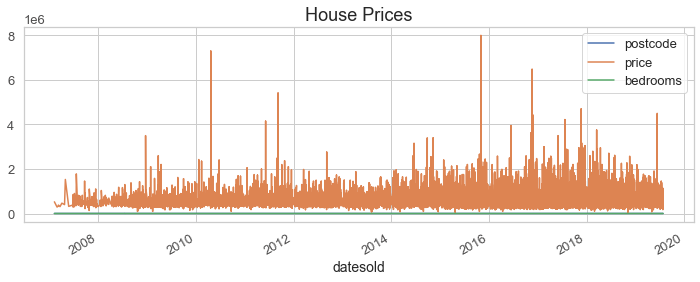

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [3]:
# Plot the house prices as a time series.
# Plot the size.
data.plot(figsize = (12, 4))

# Specify the legend and title of the plot.
plt.legend(loc = 'best')
plt.title('House Prices')
plt.show(block = False)

# Check for missing values.
data.isnull().sum()

### Checking the dataset for the count of houses based on their bedrooms

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count the number of bedrooms')

<AxesSubplot:title={'center':'Count the number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

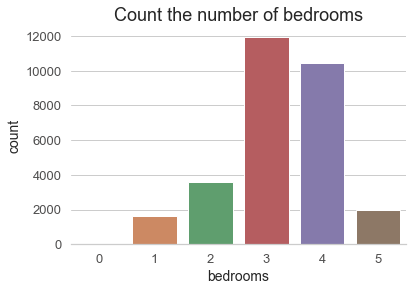

In [4]:
# Count the number of values in a specified column in the DataFrame.
print(data['bedrooms'].value_counts())

# Create a plot.
plt.title('Count the number of bedrooms')

sns.despine(left = True)
sns.countplot(x = 'bedrooms', data = data)

### Define sub-data sets

In [5]:
# Create a copy of the original data for convinience.
data_sub = data.copy()


# Data set cosnsisting of houses with 1 bedroom: 
df_1 = data_sub[data_sub['bedrooms'] == 1]
print(df_1.shape)


# Data set cosnsisting of houses with 2 bedrooms: 
df_2 = data_sub[data_sub['bedrooms'] == 2]
print(df_2.shape)


# Data set cosnsisting of houses with 3 bedrooms: 
df_3 = data_sub[data_sub['bedrooms'] == 3]
print(df_3.shape)


# Data set cosnsisting of houses with 4 bedrooms: 
df_4 = data_sub[data_sub['bedrooms'] == 4]
print(df_4.shape)


# Data set cosnsisting of houses with 5 bedrooms: 
df_5 = data_sub[data_sub['bedrooms'] == 5]
print(df_5.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


### Detect outliers

(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

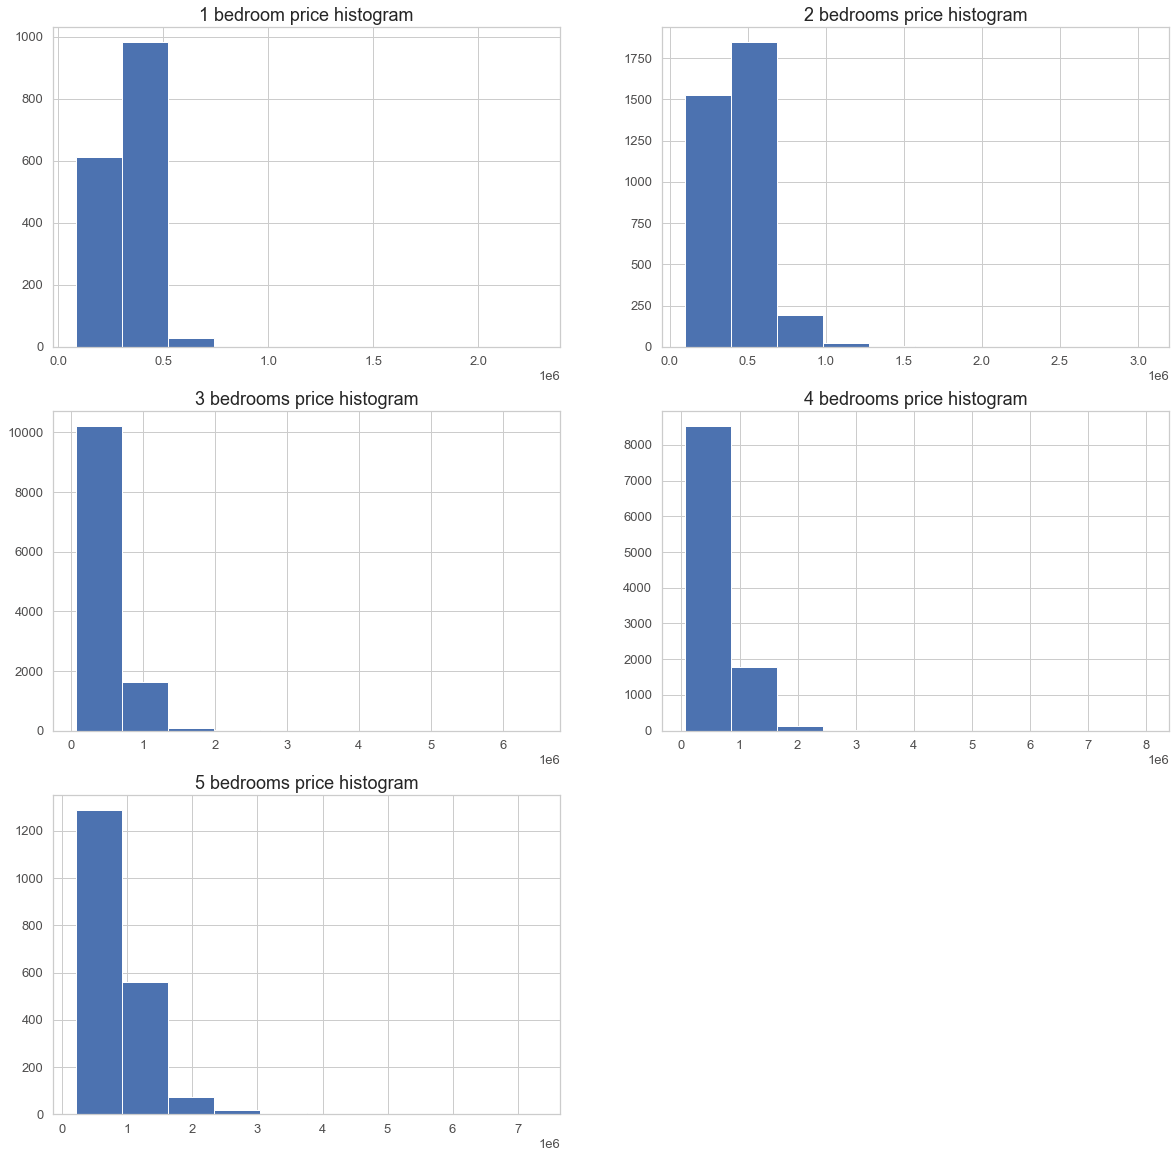

In [6]:
# Set the plot size.
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# 1 bedroom:
axes[0][0].hist(df_1['price'])
axes[0][0].title.set_text('1 bedroom price histogram')

# 2 bedrooms:
axes[0][1].hist(df_2['price'])
axes[0][1].title.set_text('2 bedrooms price histogram')

# 3 bedrooms:
axes[1][0].hist(df_3['price'])
axes[1][0].title.set_text('3 bedrooms price histogram')

# 4 bedrooms:
axes[1][1].hist(df_4['price'])
axes[1][1].title.set_text('4 bedrooms price histogram')

# 5 bedrooms:
axes[2][0].hist(df_5['price'])
axes[2][0].title.set_text('5 bedrooms price histogram')

fig.delaxes(axes[2][1])

plt.show()

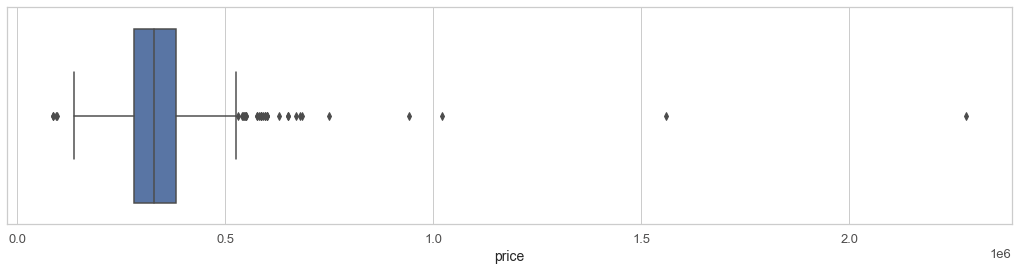

In [7]:
# Create a boxplot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize = (18, 4))

# Create a boxplot.
ax = sns.boxplot(x = df_1['price'], whis = 1.5)

### Remove outliers

In [8]:
# Remove outliers for houses with 1 bedroom.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_1[cols].quantile(0.25)
Q3 = df_1[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_1[cols] < (Q1 - 1.5 * IQR)) | (df_1[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_1_non_outlier = df_1[condition]
df_1_non_outlier.shape

price    100250.0
dtype: float64

(1592, 4)

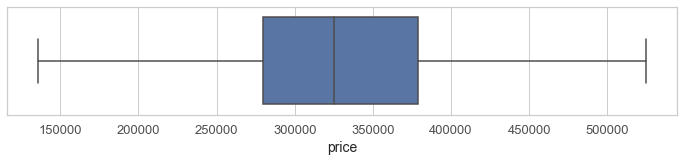

In [9]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_1_non_outlier['price'], whis = 1.5)

### Dataset with 2 bedroom (df_2)

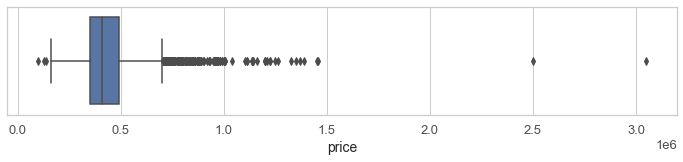

In [10]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_2['price'], whis = 1.5)

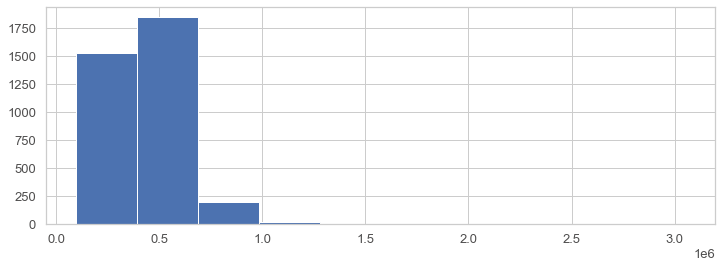

In [12]:
# Histogram plot
fig = df_2.price.hist(figsize = (12,4))

In [13]:
# Remove outliers for houses with 2 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_2[cols].quantile(0.25)
Q3 = df_2[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_2[cols] < (Q1 - 1.5 * IQR)) | (df_2[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_2_non_outlier = df_2[condition]
df_2_non_outlier.shape

price    140000.0
dtype: float64

(3387, 4)

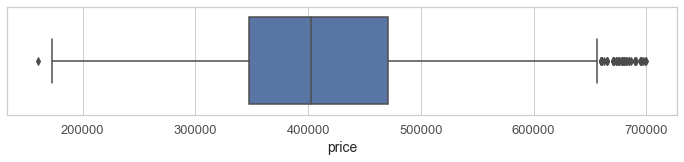

In [14]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_2_non_outlier['price'], whis = 1.5)

### Dataset with 3 bedroom (df_3)

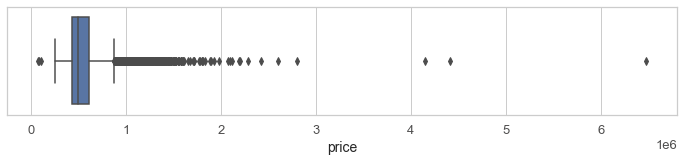

In [15]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_3['price'], whis = 1.5)

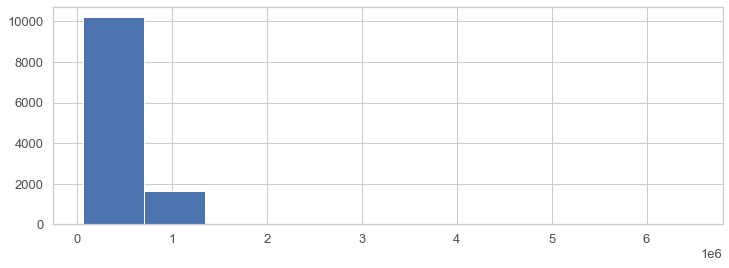

In [16]:
# Histogram plot
fig = df_3.price.hist(figsize = (12,4))

In [17]:
# Remove outliers for houses with 3 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_3[cols].quantile(0.25)
Q3 = df_3[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_3[cols] < (Q1 - 1.5 * IQR)) | (df_3[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_3_non_outlier = df_3[condition]
df_3_non_outlier.shape

price    177500.0
dtype: float64

(11254, 4)

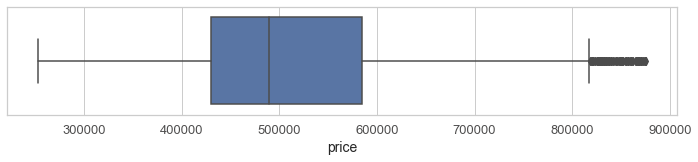

In [18]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_3_non_outlier['price'], whis = 1.5)

### Dataset with 4 bedroom (df_4)

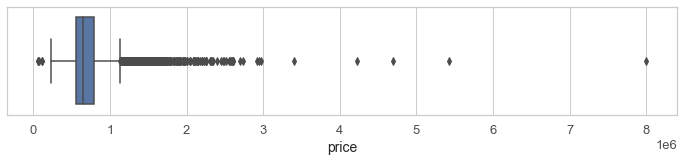

In [19]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_4['price'], whis = 1.5)

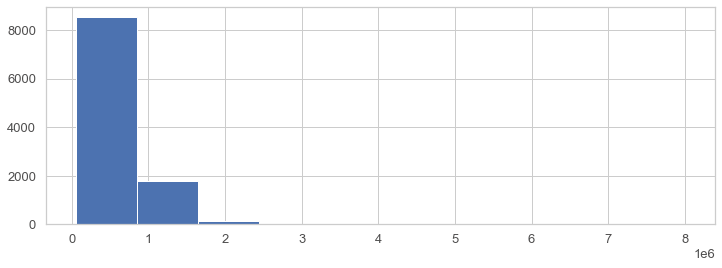

In [20]:
# Histogram plot
fig = df_4.price.hist(figsize = (12,4))

In [21]:
# Remove outliers for houses with 4 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_4[cols].quantile(0.25)
Q3 = df_4[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_4[cols] < (Q1 - 1.5 * IQR)) | (df_4[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_4_non_outlier = df_4[condition]
df_4_non_outlier.shape

price    230500.0
dtype: float64

(9772, 4)

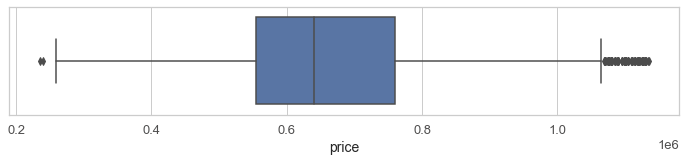

In [22]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_4_non_outlier['price'], whis = 1.5)

### Dataset with 5 bedroom (df_5)

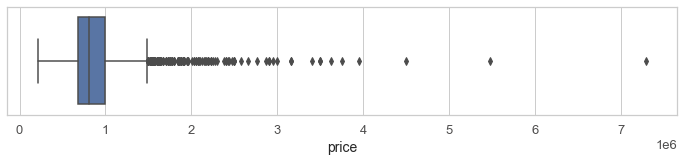

In [23]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_5['price'], whis = 1.5)

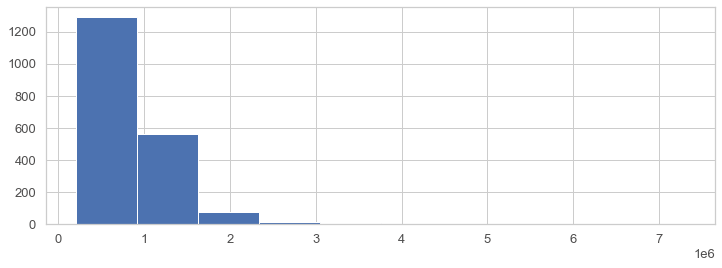

In [24]:
# Histogram plot
fig = df_5.price.hist(figsize = (12,4))

In [25]:
# Remove outliers for houses with 5 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_5[cols].quantile(0.25)
Q3 = df_5[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_5[cols] < (Q1 - 1.5 * IQR)) | (df_5[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_5_non_outlier = df_5[condition]
df_5_non_outlier.shape

price    325000.0
dtype: float64

(1809, 4)

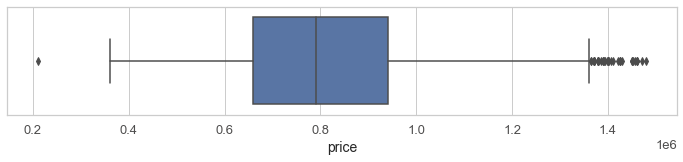

In [26]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_5_non_outlier['price'], whis = 1.5)